# HOUSE PRICES

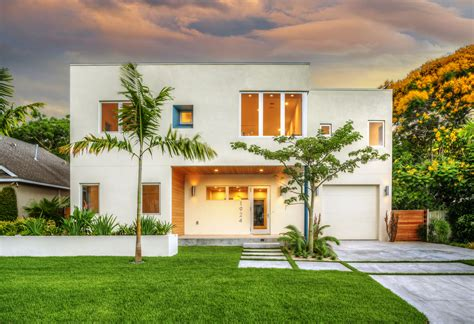

Problem : Predict house prices in Ames, lowa and USA by utilizing [dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

Hypothesis: Use 5% significant levels

if p-value < 0.05 reject H0

if p-value > 0.05 receive H0



## Data Understanding


Quantitative (numeric):

* 1stFlrSF - First Floor square feet
* 2ndFlrSF - Second floor square feet
* 3SsnPorch - Three season porch area in square feet
* Bedroom - Number of bedrooms above basement level
* BsmtFinSF1 - Type 1 finished square feet
* BsmtFinSF2 - Type 2 finished square feet
* BsmtFullBath - Basement full bathrooms
* BsmtHalfBath - Basement half bathrooms
* BsmtUnfSF - Unfinished square feet of basement area
* EnclosedPorch - Enclosed porch area in square feet
* Fireplaces - Number of fireplaces
* FullBath - Full bathrooms above grade
* GarageArea - Size of garage in square feet
* GarageCars - Size of garage in car capacity
* GarageYrBlt - Year garage was built
* GrLivArea - Above grade (ground) living area square feet
* HalfBath - Half baths above grade
* Kitchen - Number of kitchens
* LotArea - Lot size in square feet
* LotFrontage - Linear feet of street connected to property
* LowQualFinSF - Low quality finished square feet (all floors)
* MSSubClass - The building class
* MasVnrArea - Masonry veneer area in square feet
* MiscVal - Value of miscellaneous feature
* MoSold - Month Sold
* OpenPorchSF - Open porch area in square feet
* OverallCond - Overall condition rating
* OverallQual - Overall material and finish quality
* PoolArea - Pool area in square feet
* ScreenPorch - Screen porch area in square feet
* TotRmsAbvGrd - Total rooms above grade (does not include bathrooms)
* TotalBsmtSF - Total square feet of basement area
* WoodDeckSF - Wood deck area in square feet
* YearBuilt - Original construction date
* YearRemodAdd - Remodel date
* YrSold - Year Sold
* 3SsnPorch - Three season porch area in square feet
* SalePrice - the property's sale price in dollars 


Qualitative (categorical): 

* Alley - Type of alley access
* BldgType - Type of dwelling
* BsmtCond - General condition of the basement
* BsmtExposure - Walkout or garden level basement walls
* BsmtFinType1 - Quality of basement finished area
* BsmtFinType2 - Quality of second finished area (if present)
* BsmtQual - Height of the basement
* CentralAir - Central air conditioning
* Condition1 - Proximity to main road or railroad
* Condition2 - Proximity to main road or railroad (if a second is present)
* Electrical - Electrical system
* ExterQual - Exterior material quality
* ExterCond - Present condition of the material on the exterior
* Exterior1st - Exterior covering on house
* Exterior2nd - Exterior covering on house (if more than one material)
* Fence - Fence quality
* FireplaceQu - Fireplace quality
* Foundation - Type of foundation
* Functional - Home functionality rating
* GarageCond - Garage condition
* GarageFinish - Interior finish of the garage
* GarageQual - Garage quality
* GarageType - Garage location
* Heating - Type of heating
* HeatingQC - Heating quality and condition
* HouseStyle - Style of dwelling
* KitchenQual - Kitchen quality
* LandContour - Flatness of the property
* LandSlope - Slope of property
* LotConfig - Lot configuration
* LotShape - General shape of property
* MSZoning - The general zoning classification 
* MasVnrType - Masonry veneer type
* MiscFeature - Miscellaneous feature not covered in other categories
* Neighborhood - Physical locations within Ames city limits
* PavedDrive - Paved driveway
* PoolQC - Pool quality
* RoofMatl - Roof material
* RoofStyle - Type of roof
* SaleCondition - Condition of sale
* SaleType - Type of sale
* Street - Type of road access
* Utilities - Type of utilities available







# Preparation

In [1]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt, xgboost as xgb
plt.rcParams['figure.figsize'] = (10.0,8.0)
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
# load data
train = pd.read_csv('/content/drive/MyDrive/DSU/house_prices/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DSU/house_prices/dataset/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape[0], train.shape[1]

(1460, 81)

# Exploratory Data Analysis

In [4]:
train.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# is there is any missing value ?
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
# Which feature that contain missing value? and how much?
missing = (train.isnull().sum()/len(train)) * 100
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [9]:
print(type(missing))

<class 'pandas.core.series.Series'>


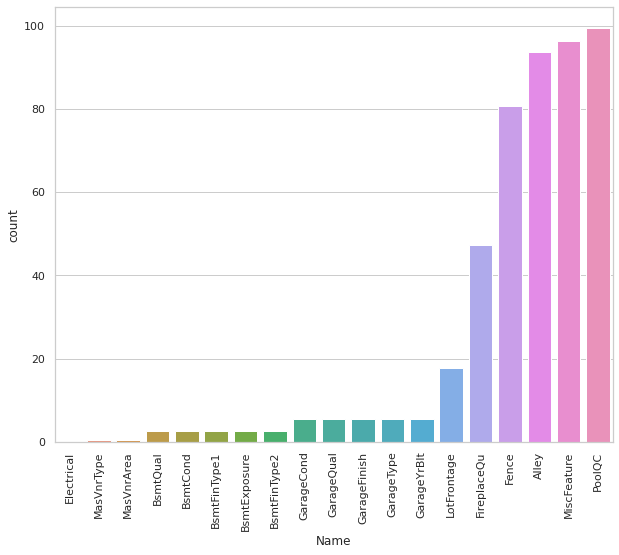

In [10]:
missing = missing.to_frame()
missing.columns = ['count']
missing.index.names = ['Name']
missing['Name'] = missing.index
sns.set(style='whitegrid', color_codes = True)
sns.barplot(x = 'Name', y = 'count', data = missing)
plt.xticks(rotation = 90)
plt.show()



> There are 19 features with missing values and the highest proportion is 99.5% in PoolQC. Then followed by MiscFeature, Alley and Fence that have over 50% of missing values.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


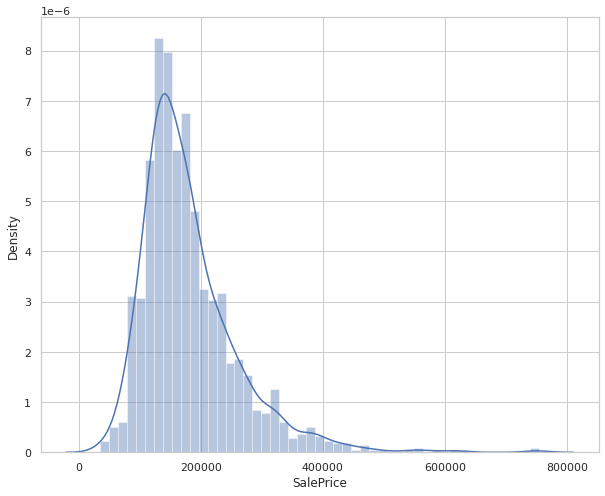

In [11]:
# Check skewness
train['SalePrice'].skew()
sns.distplot(train['SalePrice'])



> It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. 



Skewness is  0.12133506220520406


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


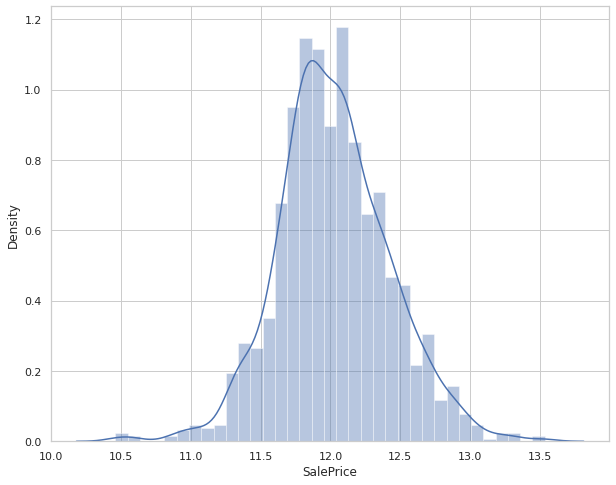

In [12]:
# log transformation 
target = np.log(train['SalePrice'])
print('Skewness is ', target.skew())
sns.distplot(target)

In [13]:
# separate numeric and category data into new dataframes
numeric_data = train.select_dtypes(include = [np.number])
cat_data = train.select_dtypes(exclude = [np.number])
numeric_data.shape[1], cat_data.shape[1]

(38, 43)

In [14]:
del numeric_data['Id']
numeric_data.shape[1]

37

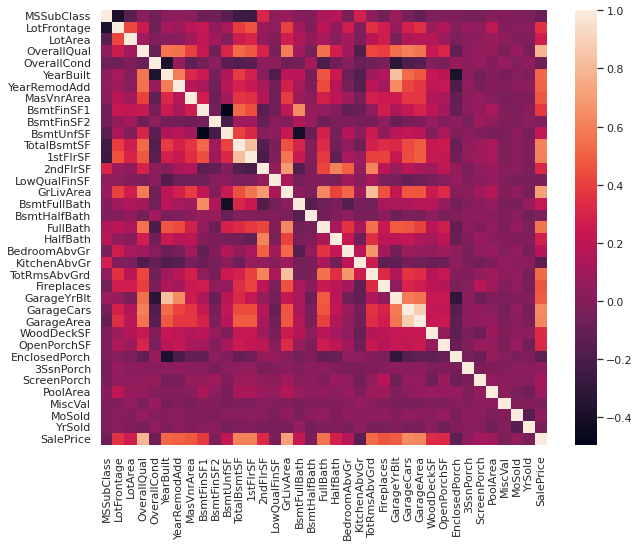

In [15]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [16]:
print (corr['SalePrice'].sort_values(ascending = False)[:15], '\n')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 





> Based on information obtained from heatmaps and correlation scores, it can be seen that the OverallQuall (79%) has the highest correlation with the SalePrice target variable.

> OverallQuall relates to the quality of overall building materials. This is makes sense because people definitely buy a house with quality of material as the main consideration.

> Then second position there is GrLivArea (70%) referring to the height of the residence from the ground level. This is interesting because it turns out to have quite a large effect on house prices.

> While the garage for cars (64%), area for garage (62%), total basement area (61%) are other important features that determine SalePrice



In [17]:
print(corr['SalePrice'].sort_values(ascending = False)[-10:], '\n')

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [18]:
# Lets see how OverallQuall looks like
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [19]:
pivot = train.pivot_table(index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
print(pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


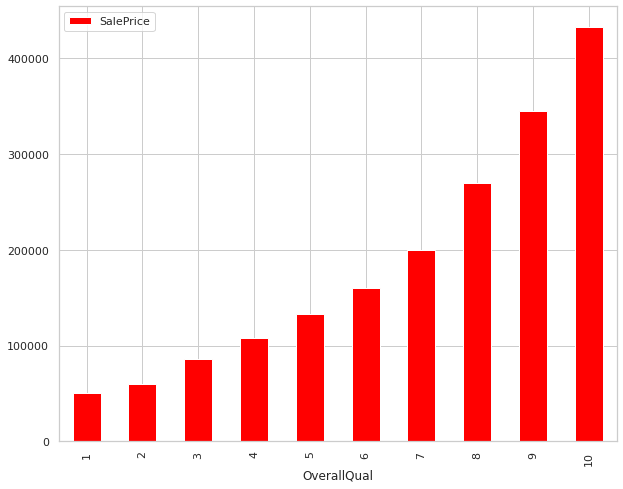

In [20]:
pivot.plot(kind = 'bar', color ='red')

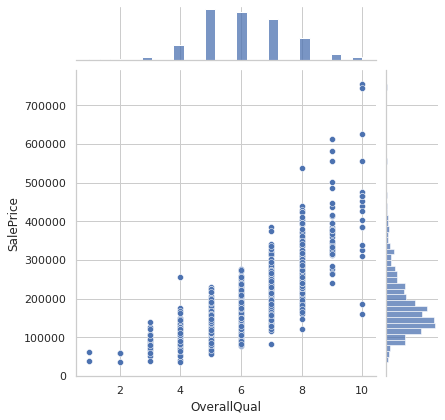

In [21]:
sns.jointplot(x = train['OverallQual'], y = train['SalePrice'])



> OverallQuall is an ordinal data that contain quality scale from 1 to 10 where the larger the scale, the higher the SalePrice.



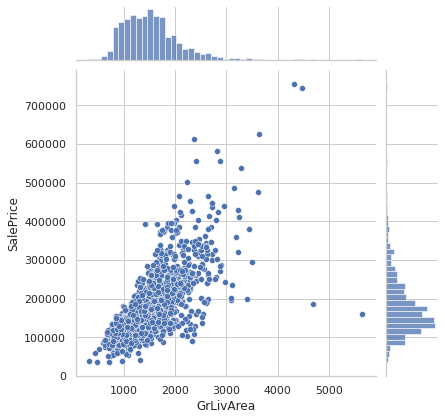

In [22]:
sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'])



> The graph shows that there is a direct correlation between GrLivArea and SalePrice. It is interesting that there are outliers where GrLivArea over 5000 has a downward trend in SalePrice.



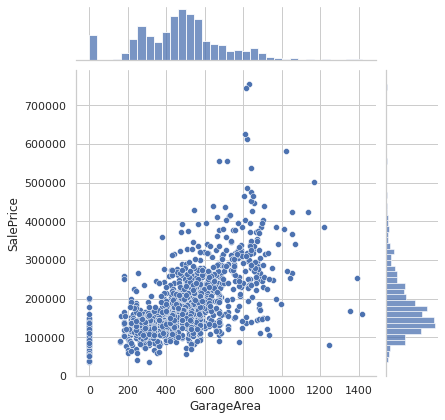

In [23]:
sns.jointplot(x = train['GarageArea'], y = train['SalePrice'])



> It can be seen that there is a tendency that the wider the garage area, the higher the house price. However, for areas above 1000 there is a tendency for house prices to decline.



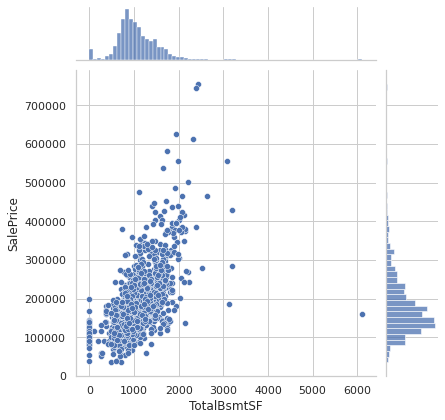

In [24]:
sns.jointplot(x = train['TotalBsmtSF'], y = train['SalePrice'])



> The total basement area has an outlier, namely for data above 6000 it has a cheap selling price, I assume that the data has poor housing feature conditions



In [25]:
numeric_data.columns[numeric_data.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [26]:
cat_data.columns[cat_data.isnull().any()]

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [27]:
# To find out what affects the condition of house sales, we can observe the relationship of the SaleCondition and SalePrice variables
sp_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


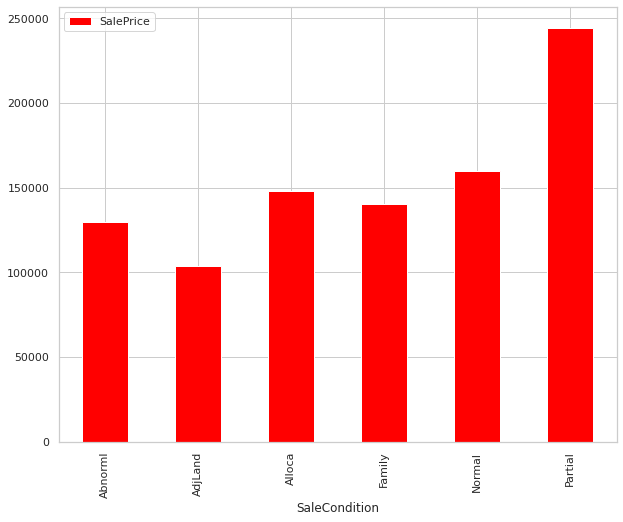

In [28]:
sp_pivot.plot(kind = 'bar', color = 'red')



> The condition for selling houses with the highest mean is in the partial category, that is when the house was not complete when last assessed.

> However, the mean does not provide more information about the correlation between numerical and categorical variables. Therefore, ANOVA test (Analysis of Variance) was used.



## ANOVA

ANOVA is a statistical test used to determine whether there is a significant difference between group mean values.


*   H0 : no significat
*   Ha : significant



<ipython-input-29-9f3af593a065>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['SalePrice'] = train.SalePrice.values
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

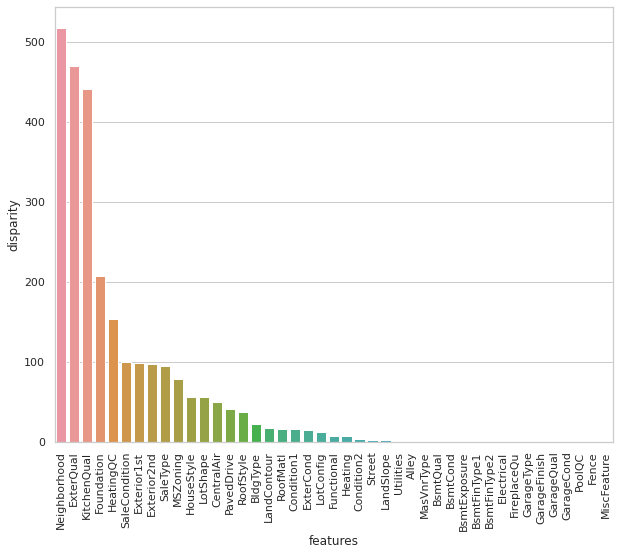

In [29]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']

def anova(frame):
  anv = pd.DataFrame()
  anv['features'] = cat
  pvals = []
  for c in cat:
    samples = []
    for cls in frame[c].unique():
      s = frame[frame[c] == cls]['SalePrice'].values
      samples.append(s)
    pval = stats.f_oneway(*samples)[1]
    pvals.append(pval)
  anv['pval'] = pvals
  return anv.sort_values('pval')

cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data = k, x = 'features', y = 'disparity')
plt.xticks(rotation = 90)
plt



> Based on the ANOVA test from all of categorical variables, turns out that neighborhood (physical location within city limits, such as mosque, bridge, park, school, etc) is the most important variable. Followed by Exterior Quality, Kitchen Quality and so on.



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

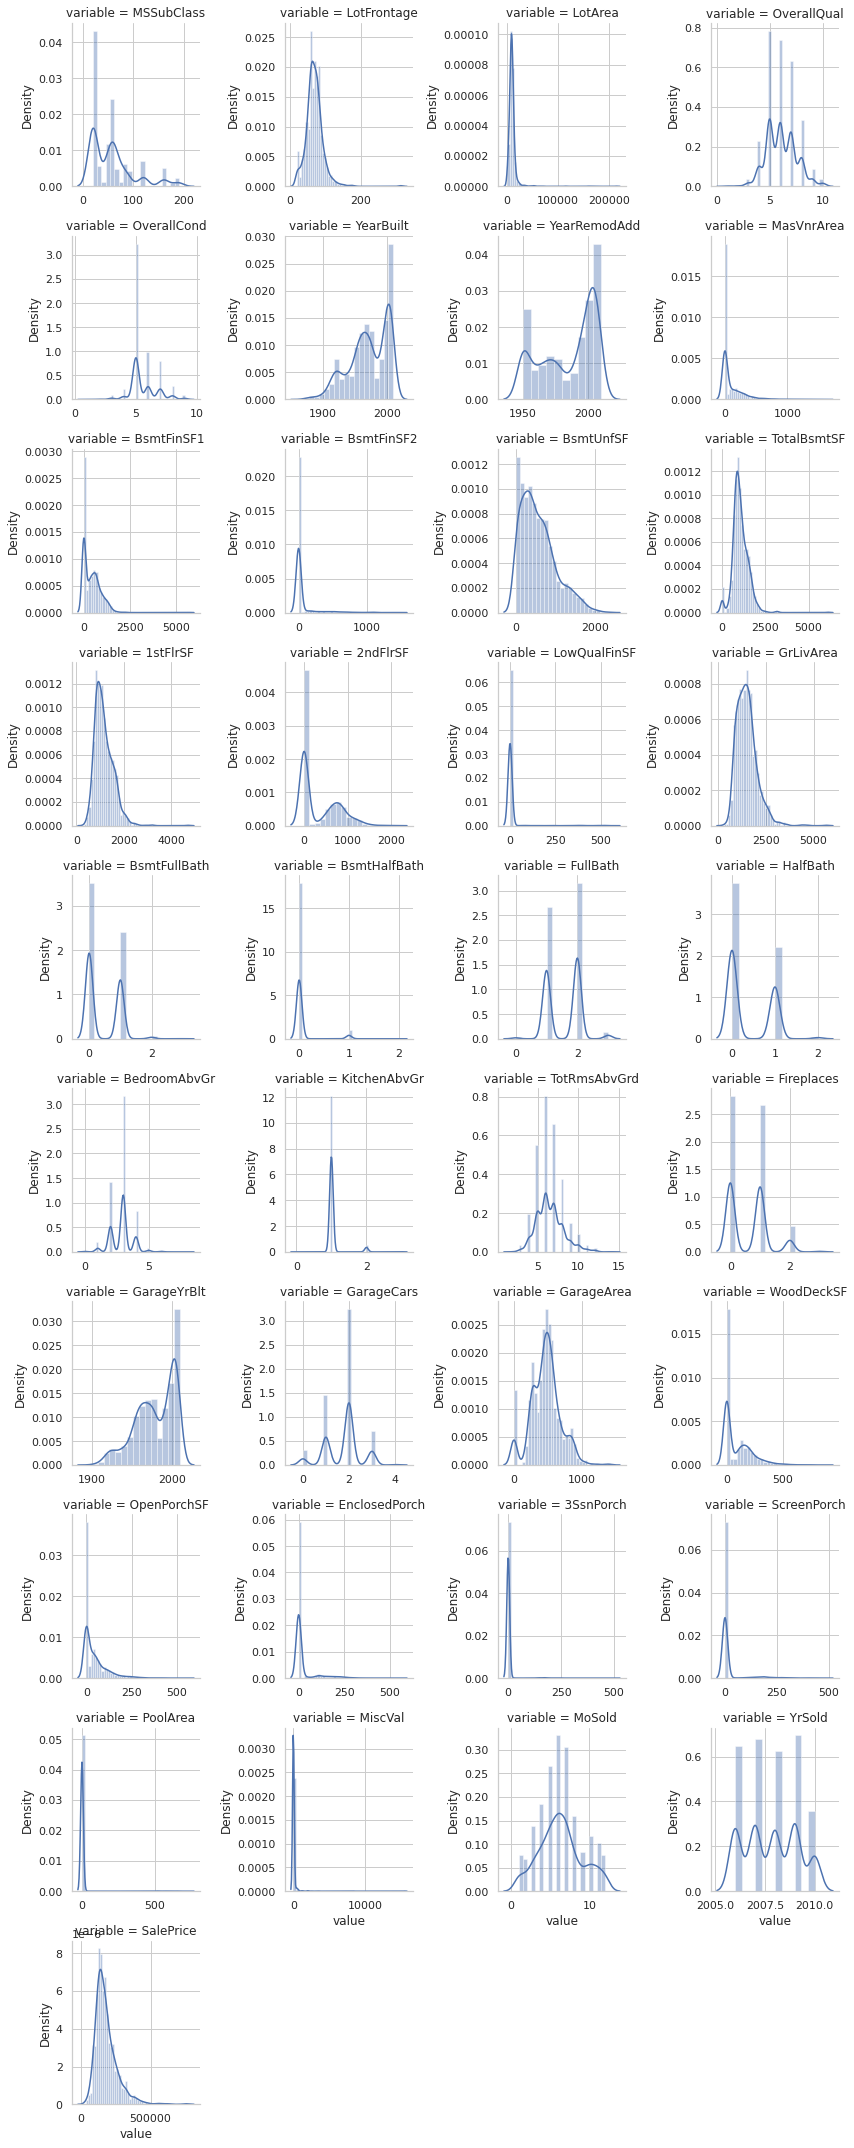

In [30]:
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
nl = sns.FacetGrid (nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
nl = nl.map(sns.distplot, 'value')
nl

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid po

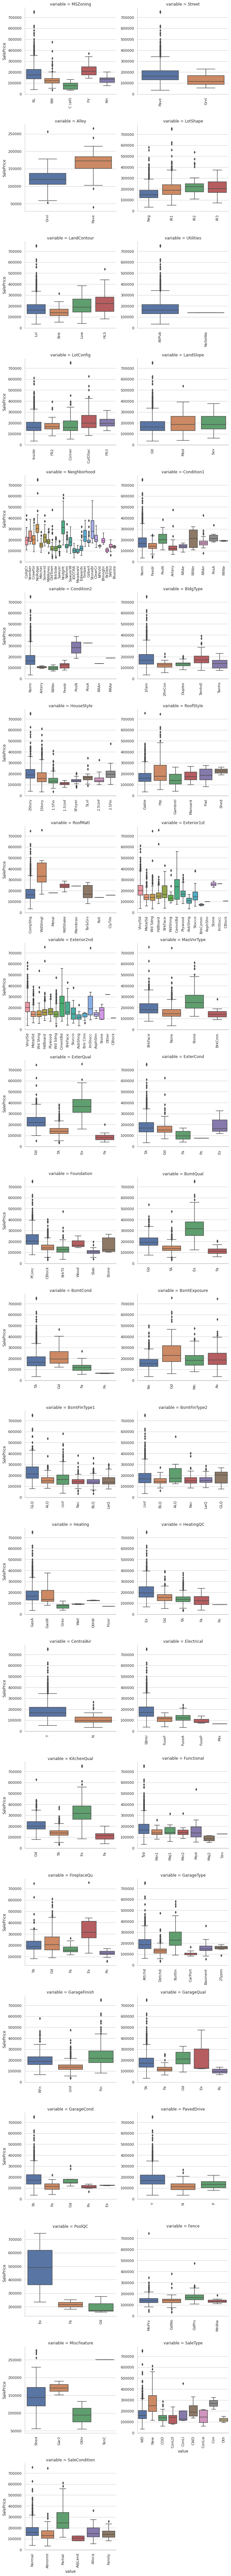

In [31]:
def boxplot(x, y, **kwaargs):
  sns.boxplot(x,y)
  x = plt.xticks(rotation= 90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']
p = pd.melt(train, id_vars = 'SalePrice', value_vars = cat)
g = sns.FacetGrid(p, col='variable', col_wrap = 2, sharex = False, sharey = False, size = 5)
g = g.map(boxplot, 'value', 'SalePrice')
g

# Preprocessing

In [32]:
# remove outliers
train.drop(train[train['GrLivArea'] > 4000].index, inplace = True)
train.shape

(1456, 81)

In [33]:
# remove outliers
train.drop(train[train['GarageArea'] > 1200].index, inplace = True)
train.shape

(1452, 81)

In [34]:
cat_data.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [35]:
cat_data.shape[1]

44

In [36]:
# remove missing values > 50%
train.drop(['PoolQC', 'MiscFeature','Alley','Fence'], inplace=True, axis=1)
test.drop(['PoolQC', 'MiscFeature','Alley','Fence'], inplace=True, axis=1)

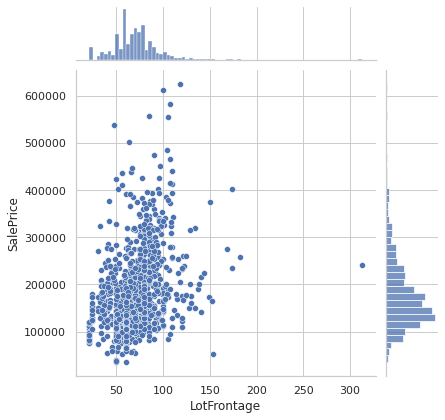

In [37]:
sns.jointplot(x = train['LotFrontage'], y = train['SalePrice'])

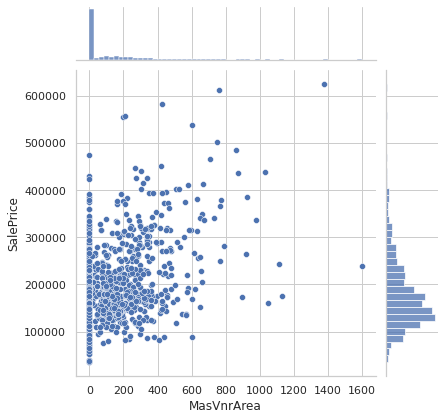

In [38]:
sns.jointplot(x = train['MasVnrArea'], y = train['SalePrice'])



> There are outliers in the LotFrontage variable, which is data > 300 and MasVnrArea data > 1200. However, handling missing values by changing value using mean is not appropriate unless these outliers are excluded from the dataset or imputed using the median.

In [39]:
# replace missing value for numerical data
median_LotFrontage = train.LotFrontage.median()
median_MasVnrArea = train.MasVnrArea.median()

train["LotFrontage"].fillna(median_LotFrontage,inplace=True)
train['MasVnrArea'].fillna(median_MasVnrArea, inplace=True)

In [40]:
# replace missing value for categorical data
mode_MasVnrType = train.MasVnrType.mode()
mode_Electrical = train.Electrical.mode()
mode_FireplaceQu = train.FireplaceQu.mode()

train["MasVnrType"].fillna(mode_MasVnrType,inplace=True)
train['Electrical'].fillna(mode_Electrical, inplace=True)
train['FireplaceQu'].fillna(mode_FireplaceQu, inplace=True)

In [51]:
# Select the columns to check for missing values
columns = ['GarageType', 'GarageFinish', 'GarageQual','GarageCond','GarageYrBlt' ]

# Remove rows with missing values in any of the selected columns
train = train.dropna(subset=columns)

In [52]:
# is the data still has missing value ?
train.columns[train.isnull().any()]

Index([], dtype='object')

In [53]:
train.shape

(1371, 77)

In [37]:
# Option 1: get_dummies (0-1)
# encode categorical data to 0-1

#train['enc_street'] = pd.get_dummies(train.Street, drop_first = True)
#test['enc_street'] = pd.get_dummies(train.Street, drop_first = True)

#train['enc_CentralAir'] = pd.get_dummies(train.CentralAir, drop_first = True)
#test['enc_CentralAir'] = pd.get_dummies(train.CentralAir, drop_first = True)

In [ ]:
# Option 2 :

#condition_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
#condition_pivot.plot(kind = 'bar', color = 'blue')
#plt.show()

#def encode(x): return 1 if x == 'Partial' else 0

#train['enc_condition'] = train.SaleCondition.apply(encode)
#test['enc_condition'] = test.SaleCondition.apply(encode)

In [ ]:
# Option 3:

#print(train.LotShape.unique())
#pt = train.pivot_table(index = 'LotShape', values = 'SalePrice', aggfunc = np.median)
#plt.plot(kind = 'bar', color = 'blue')
#plt.show()

#LotShape_D = pd.get_dummies(train.LotShape)
#train = pd.concat([train, LotShape_D], axis = 1)
#test = pd.concat([test, LotShape_D], axis = 1)

In [54]:
# encode categorical data > 2 category or ordinal
# Label encoder (0,1,2,3,4,etc) 

from sklearn.preprocessing import LabelEncoder

# Create a label encoder
encoder = LabelEncoder()

# Encode the column and replace the original column with the encoded values
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = encoder.fit_transform(train[column])

for column in test.columns:
    if test[column].dtype == 'object':
        test[column] = encoder.fit_transform(test[column])
# The resulting dataframe will have the same structure, but the 'color' column will contain integer values
# corresponding to the original categories

In [42]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

# Modelling

## Linear Regression

*   Linear Regression is a technique to quantifies the relation between one or more predictor and one outcome variable.

*   Ridge Regularization is a method of estimating coefficient of multiple-regression models in scenarios where the independent variables are highly correlated. Ridge models have a lower variance but have higher biases than OLS.

In [68]:
# split train-test data
y = np.log(train.SalePrice)
x = train.drop(['SalePrice', 'Id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size= .33)

In [69]:
# fit model
lr = linear_model.LinearRegression()
model= lr.fit(X_train, y_train)

In [70]:
print('R square is: ', model.score(X_test, y_test))

R square is:  0.9068579172857661


In [71]:
predict = model.predict(X_test)

RMSE is:  0.013078245426595423


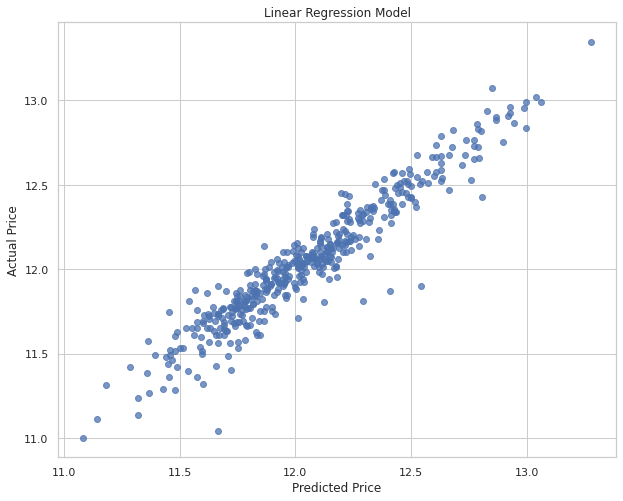

In [72]:
print('RMSE is: ', mean_squared_error(y_test, predict))
actual_values = y_test
plt.scatter(predict, actual_values, alpha =0.75, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Trainig - R squared is:  0.906883753866999
Training - RMSE is:  0.01307461766629093
Trainig - R squared is:  0.9071006827695217
Training - RMSE is:  0.013044158293420587
Trainig - R squared is:  0.9083563395682507
Training - RMSE is:  0.012867849289941098
Trainig - R squared is:  0.9103610349217774
Training - RMSE is:  0.012586366451303954
Trainig - R squared is:  0.9116178604179963
Training - RMSE is:  0.01240989334893214


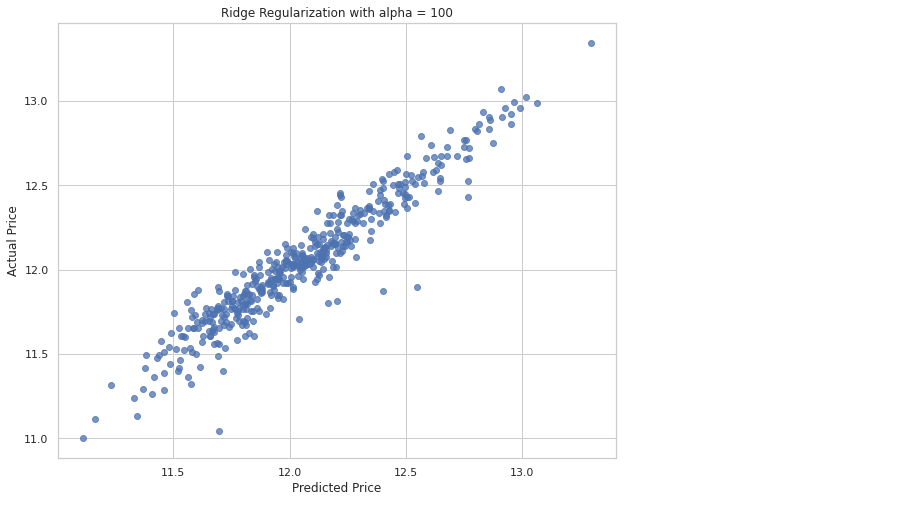

In [73]:
# ridge regularization
for i in range (-2,3):
  alpha = 10**i
  rm = linear_model.Ridge(alpha = alpha)
  ridge_model = rm.fit(X_train, y_train)
  print("Trainig - R squared is: ", ridge_model.score(X_test, y_test))
  preds_ridge = ridge_model.predict(X_test)
  print('Training - RMSE is: ', mean_squared_error(y_test, preds_ridge))

plt.scatter(preds_ridge, actual_values, alpha = .75, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regularization with alpha = {}'.format(alpha))
overlay ='R squared is: {}, RMSE is: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
plt.annotate(s = overlay, xy=(12.1, 10.6), size = 'x-large')
plt.show()

## Lasso

*   Lasso (Least Absolute Shrinkage and Selection Operator) is a regression method that can perform variable selection and regularization to improve predictions. Lasso aims to minimize cost function (OLS) but have weight normalization (L1).

Training - R squared is:  0.9127908614437398
Training - RMSE is:  0.012245190189487153


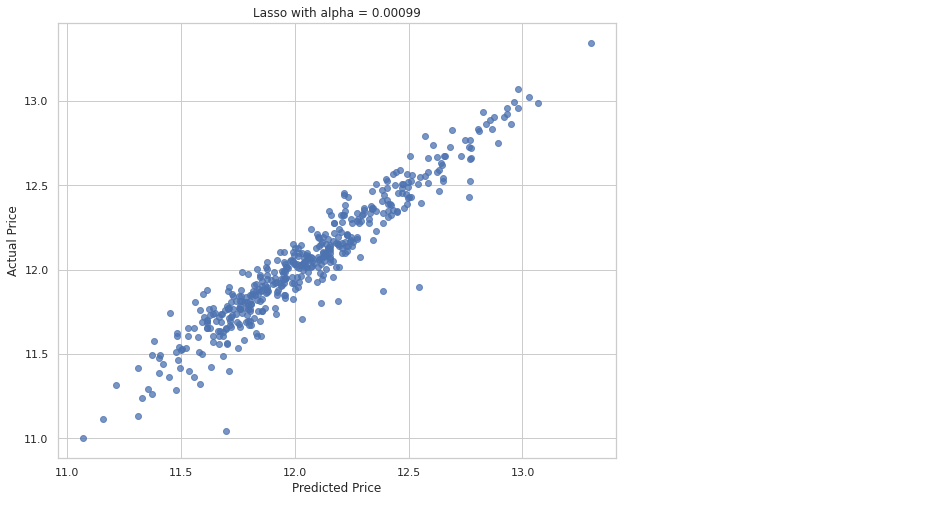

In [64]:
alpha = 0.00099
lasso = Lasso(alpha=alpha, max_iter= 50000) 
lasso_model = lasso.fit(X_train, y_train)
print('Training - R squared is: ', lasso_model.score(X_test, y_test))
preds_lasso = lasso_model.predict(X_test)
print('Training - RMSE is: ', mean_squared_error(y_test, preds_lasso))

plt.scatter(preds_lasso, actual_values, alpha =.75, color ='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso with alpha = {}'.format(alpha))
overlay ='R squared is: {}, RMSE is: {}'.format(lasso_model.score(X_test, y_test), mean_squared_error(y_test, preds_lasso))
plt.annotate(s = overlay, xy=(12.1, 10.6), size = 'x-large')
plt.show()

## XGBoost

*   XGBoost (EXtreme Gradient Boosting) is part of tree family that an ensemble methtod in purpose to reducing bias and variance.

Training - R squared is:  0.8971803414113575
Training - RMSE is:  0.014437091060403364


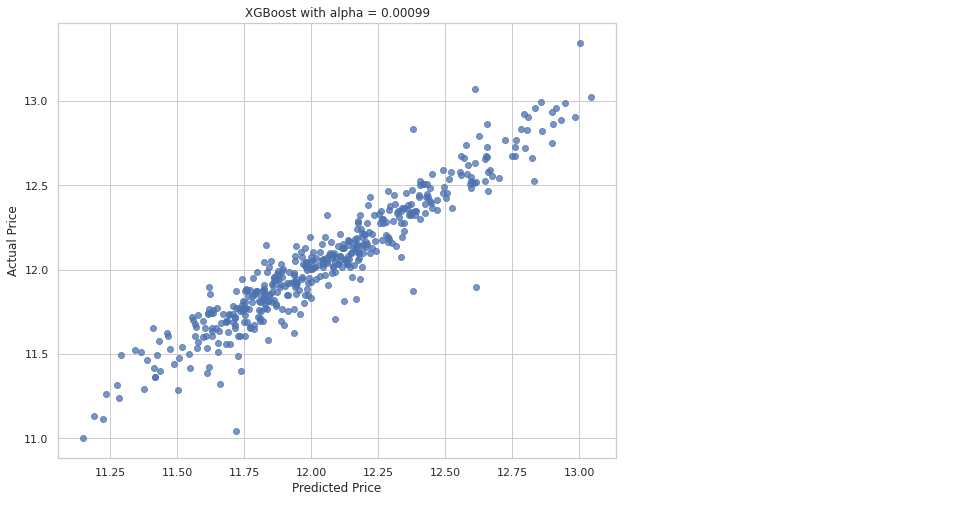

In [66]:
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, 
                        max_depth=6, min_child_weight=1.5, n_estimators=7200, 
                        reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, 
                        seed=42, silent=1)

xgb_model= regr.fit(X_train, y_train)
print('Training - R squared is: ', xgb_model.score(X_test, y_test))
preds_xgb = xgb_model.predict(X_test)
print('Training - RMSE is: ', mean_squared_error(y_test, preds_xgb))

plt.scatter(preds_xgb, actual_values, alpha =.75, color ='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost with alpha = {}'.format(alpha))
overlay ='R squared is: {}, RMSE is: {}'.format(xgb_model.score(X_test, y_test), mean_squared_error(y_test, preds_xgb))
plt.annotate(s = overlay, xy=(12.1, 10.6), size = 'x-large')
plt.show()